# Decision Trees

## Library import

In [49]:
import numpy as np

from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

from sklearn import tree
import matplotlib.pyplot as plt

## Dataset loading

In [50]:
iris = load_iris()

X = iris.data
y = iris.target

print("Feature names: ", iris.feature_names)
print("Target names: ", iris.target_names)
print("Shape: ", X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Feature names:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names:  ['setosa' 'versicolor' 'virginica']
Shape:  (150, 4)


## Model

In [51]:
# using gini impurity
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

# Using entropy
clf1 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

clf.fit(X_train, y_train)

clf1.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


## Making prediction

In [52]:
prediction = clf.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, prediction, target_names=iris.target_names))


Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [53]:
prediction = clf1.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, prediction, target_names=iris.target_names))


Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



## Visualization

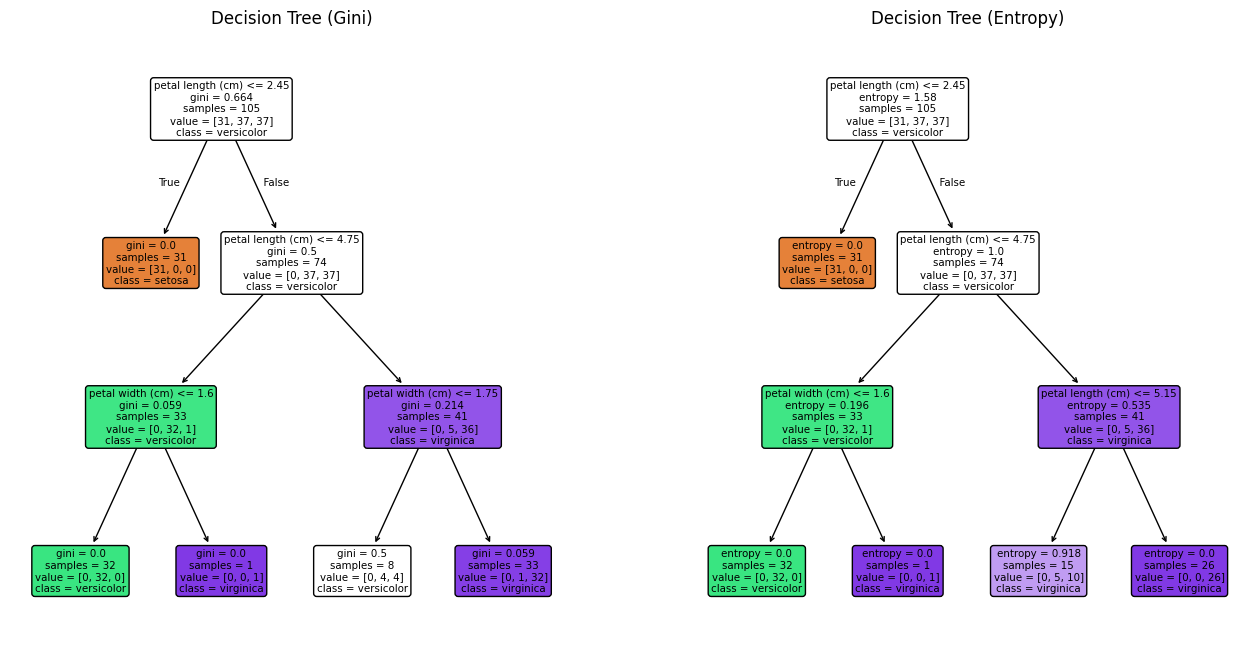

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

tree.plot_tree(
    clf,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    rounded=True,
    ax=axes[0]
)

tree.plot_tree(
    clf1,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    rounded=True,
    ax=axes[1]
)

axes[0].set_title("Decision Tree (Gini)")
axes[1].set_title("Decision Tree (Entropy)")

plt.show()


## Optimal features

In [55]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        "criterion": ['gini', 'entropy'],
        'max_depth': range(2, 10)
    }
]

clfTree = DecisionTreeClassifier()

clfGrid = GridSearchCV(
    clfTree, param_grid, cv=10, scoring='f1_macro'
)

clfGrid.fit(X_train, y_train)

,estimator,DecisionTreeClassifier()
,param_grid,"[{'criterion': ['gini', 'entropy'], 'max_depth': range(2, 10)}]"
,scoring,'f1_macro'
,n_jobs,None
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [56]:
print("\nBest parameters: ", clfGrid.best_params_)
print("\nBest scores: ", clfGrid.best_score_)
print("\nBest index: ", clfGrid.best_index_)
print("\nBest estimator: ", clfGrid.best_estimator_)


Best parameters:  {'criterion': 'entropy', 'max_depth': 8}

Best scores:  0.9352645502645502

Best index:  14

Best estimator:  DecisionTreeClassifier(criterion='entropy', max_depth=8)


# Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier

## Model

In [58]:
randClf = RandomForestClassifier(n_estimators=10, max_depth=10)

randClf.fit(X_train, y_train)

,n_estimators,10
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [59]:
# Shows a tree details; the total tree details can be visualized with estimators_
randClf.estimator_

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


## Visual

Random forest uses n trees. A sample of forest(tree = 3) is visualized here.

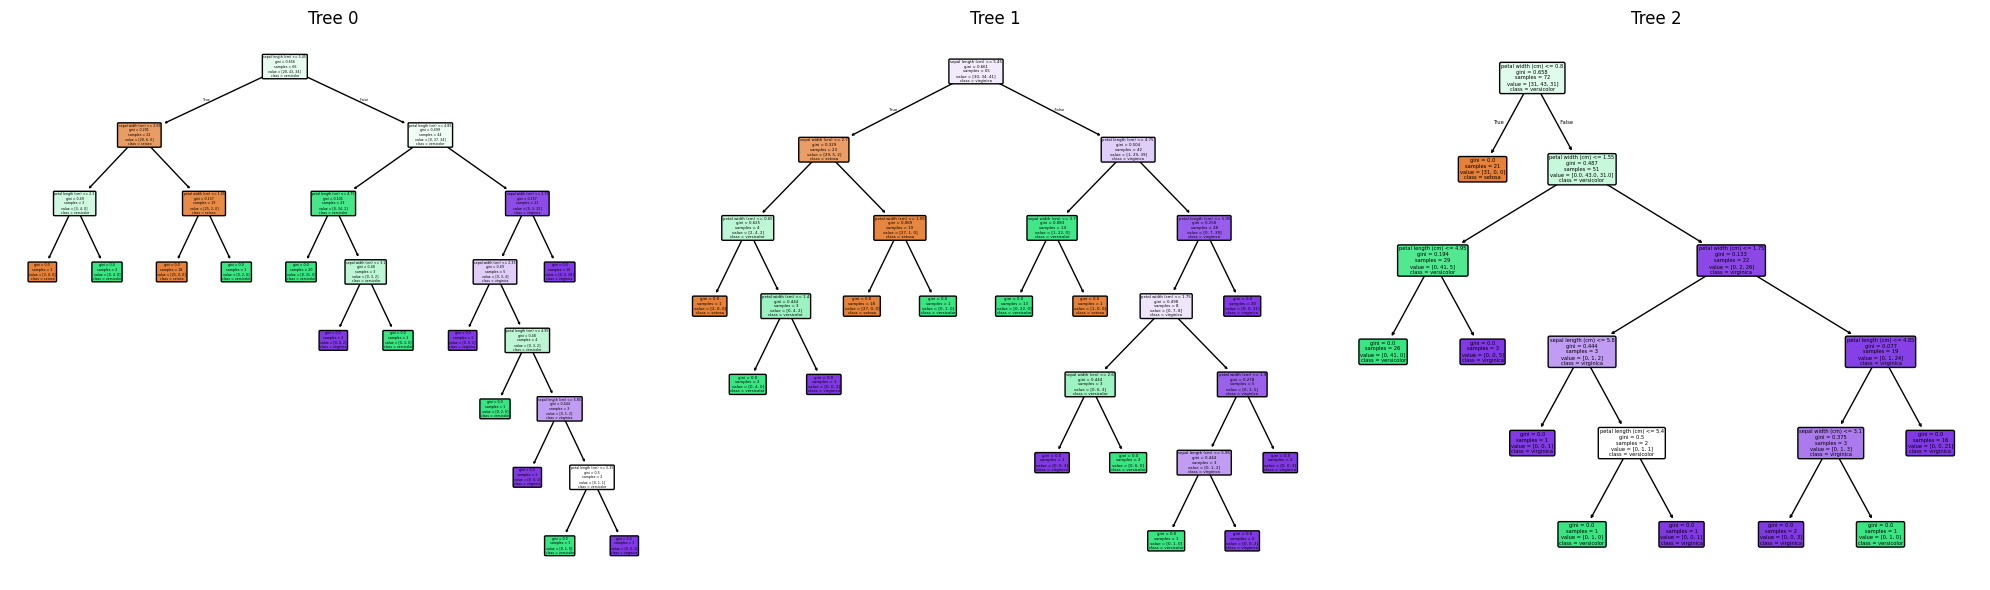

In [60]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
for i, ax in enumerate(axes):
    tree.plot_tree(
        randClf.estimators_[i],
        feature_names=iris.feature_names,
        class_names=iris.target_names,
        filled=True,
        rounded=True,
        ax=ax
    )
    ax.set_title(f"Tree {i}")
plt.tight_layout()
plt.show()


## Finding optimal parameters

In [61]:
param_grid = [
    {
        'max_depth': [10, 15],
        'n_estimators': [10, 20],
        'max_features': ['sqrt', 0.2]
    }
]

randClf = RandomForestClassifier()

randGrid = GridSearchCV(
    randClf, param_grid, cv=5, scoring='f1_weighted'
)

randGrid.fit(X_train, y_train)

,estimator,RandomForestClassifier()
,param_grid,"[{'max_depth': [10, 15], 'max_features': ['sqrt', 0.2], 'n_estimators': [10, 20]}]"
,scoring,'f1_weighted'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,20


In [62]:
randGrid.best_score_

np.float64(0.9521620443049015)

In [63]:
y_pred = randGrid.predict(X_test)

print(classification_report(y_test, y_pred,))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## Finding important features

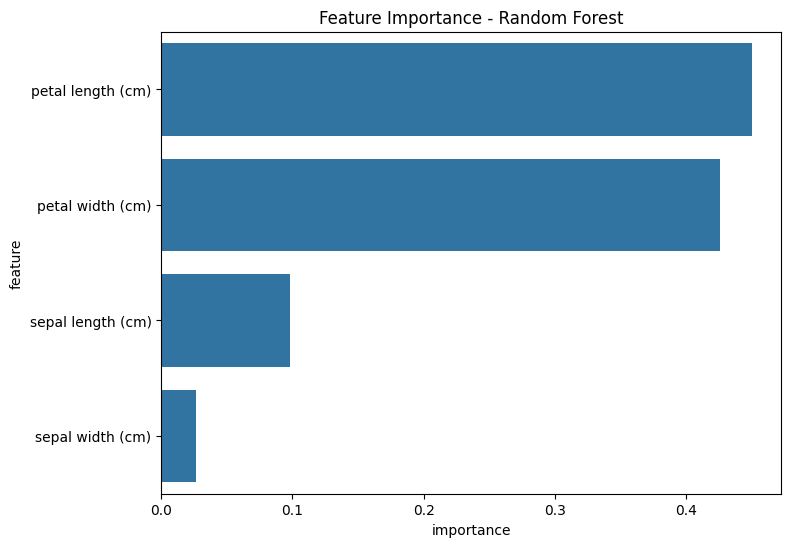

In [64]:
import pandas as pd
import seaborn as sn

randClf.fit(X_train, y_train)

# Dataframe creation to store features and corresponding importances
feature_rank = pd.DataFrame(
    {
        'feature': iris.feature_names,
        'importance': randClf.feature_importances_
    }
)

# Sorting features based on importances
feature_rank = feature_rank.sort_values('importance', ascending=False)

plt.figure(figsize=(8,6))

sn.barplot(y='feature', x='importance', data=feature_rank)

plt.title("Feature Importance - Random Forest")
plt.show()